<a href="https://colab.research.google.com/github/Varshith022006/GENRATIVE-AI-ASSIGNMENTS/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow scikit-learn pandas numpy matplotlib


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [3]:
# Load dataset
train_data = pd.read_csv('/content/train.csv')

# Drop unnecessary columns
X = train_data.drop(['Artist Name', 'Track Name', 'Class'], axis=1)
y = train_data['Class']

# Handle missing values
X = X.fillna(X.median())

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
# Define the neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(y.unique()), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,979 (78.04 KB)

 Trainable params: 19,979 (78.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3664 - loss: 1.8087 - val_accuracy: 0.4939 - val_loss: 1.3304
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5021 - loss: 1.3135 - val_accuracy: 0.4914 - val_loss: 1.2994
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5041 - loss: 1.2908 - val_accuracy: 0.4964 - val_loss: 1.3067
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5178 - loss: 1.2501 - val_accuracy: 0.5047 - val_loss: 1.2806
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5239 - loss: 1.2506 - val_accuracy: 0.5064 - val_loss: 1.2868
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5389 - loss: 1.2163 - val_accuracy: 0.5239 - val_loss: 1.2498
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5457 - loss: 1.1871 - val_accuracy: 0.5006 - val_loss: 1.2693
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5353 - loss: 1.1980 - val_accuracy: 0.

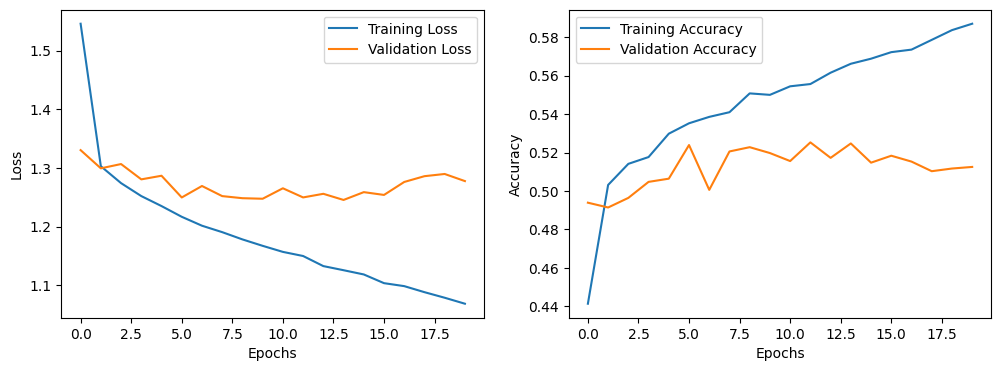

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [6]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred_classes))
print("F1 Score:", f1_score(y_val, y_pred_classes, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_classes))


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.5125
F1 Score: 0.489889904363263
Confusion Matrix:
 [[107   0   0   4  10   0   0   6   0   7   2]
 [  0  12   8   0   0  16  47   0  21  29 153]
 [  0   2 130   0   0  11  18   0   2  26  92]
 [ 18   0   0  48   6   0   0   5   0   0   1]
 [ 15   0   0   0  40   0   0   1   0  11   4]
 [  0   0  10   0   0 184   8   0   3  43  14]
 [  0   9  18   0   0  32 128   0  26  56 231]
 [  4   0   0   1   1   0   0  97   0   0   0]
 [  0   3   1   0   0   2  11   0 219   2 144]
 [ 10   3  27   1   2  48  35   0   2 249 154]
 [  4  10  46   3   6  13  67   1 123  66 631]]


In [7]:
# Example song features from the validation set
example_song = X_val[0].reshape(1, -1)

# Convert to a different style (by changing target class)
predicted_class = model.predict(example_song)
predicted_genre = np.argmax(predicted_class)

print(f"Predicted Genre (Style): {predicted_genre}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Genre (Style): 5


In [14]:
import pandas as pd

# Load the test data
test_data = pd.read_csv('/content/test.csv')
submission_data = pd.read_csv('/content/submission.csv')


In [11]:
# Drop unnecessary columns
X_test = test_data.drop(['Artist Name', 'Track Name'], axis=1)

# Handle missing values
X_test = X_test.fillna(X_test.median())

# Scale using the same scaler from training
X_test_scaled = scaler.transform(X_test)


In [12]:
# Predict the genre
test_predictions = model.predict(X_test_scaled)

# Convert to class labels
predicted_classes = np.argmax(test_predictions, axis=1)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
# Create submission dataframe with zeros
submission = pd.DataFrame(0, index=np.arange(len(predicted_classes)), columns=submission_data.columns)

# Set the predicted genre to 1
for i, genre in enumerate(predicted_classes):
    submission.iloc[i, genre] = 1

# Save to CSV
submission.to_csv('/content/submission.csv', index=False)
